In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import dataframe_image as dfi
from wordcloud import WordCloud
%matplotlib inline
sns.set_palette(sns.color_palette('rocket_r'))
sns.set_style("whitegrid")

# Gather

Read the datasets that we will use in the analysis into pandas dataframe:

In [2]:
listings = pd.read_csv('listings.csv')
listings_sum = pd.read_csv('listings_sum.csv')
reviews_sum = pd.read_csv('reviews_sum.csv')

# Assess 

Take a look at the data by printing out the first few sample rows or visualising them. We won't deal with the null values or categorical variables in this section. We will work on them separately for the questions we want to answer.

In [3]:
listings.shape

(36905, 74)

In [4]:
listings_sum.shape

(36905, 16)

In [5]:
reviews_sum.shape

(836586, 2)

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210407173759,2021-04-09,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,3,3,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210407173759,2021-04-12,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,10.0,10.0,10.0,NaN,f,1,1,0,0,4.98
2,5121,https://www.airbnb.com/rooms/5121,20210407173759,2021-04-09,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.35
3,5136,https://www.airbnb.com/rooms/5136,20210407173759,2021-04-10,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/a3f7ace8-e7a9...,7378,https://www.airbnb.com/users/show/7378,...,10.0,8.0,10.0,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,20210407173759,2021-04-12,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.26


In [7]:
listings_sum.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355


In [8]:
reviews_sum.head()

,listing_id,date
0,2595,2009-11-21
1,2595,2009-12-05
2,2595,2009-12-10
3,2595,2010-04-09
4,2595,2010-05-25


So here's our Business and Data Understanding:

From above we can have a general understanding of the information and level of these tables. Listings and listing_sum contain the information for the same set of properties and they are both snapshot as of the time the data was collected. Reviews_sum is a historical table with only the time and objective of the reviews.

# Questions and Analysis

From here, we will be structuring the following steps for each of the 3 questions we want to answer.

## How's the difference across counties

### Assess

First let's take a look at the overview

In [9]:
print('# listings in NYC: ', listings.shape[0])

# listings in NYC:  36905


In [10]:
# distribution across different counties
df_dist_county = listings['neighbourhood_group_cleansed'].value_counts(normalize=True)
print(df_dist_county)

Manhattan        0.441512
Brooklyn         0.392630
Queens           0.130822
Bronx            0.027097
Staten Island    0.007939
Name: neighbourhood_group_cleansed, dtype: float64


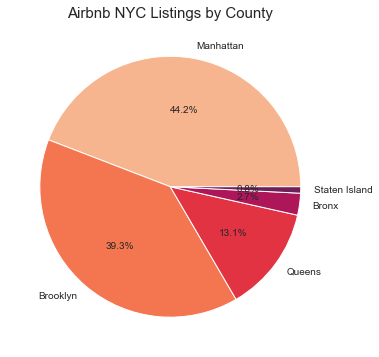

In [11]:
# visualize the listings distribution by county
fig, ax = plt.subplots()
fig.set_size_inches((6,6))
ax.pie(df_dist_county, labels = df_dist_county.index, 
        autopct='%1.1f%%',
        shadow=False)
ax.set_title('Airbnb NYC Listings by County', fontsize = 15)
fig.savefig('listings_by_county.png')
plt.show()

### Clean

We want to take look at the price. There's no null value but we need to convert it to numbers.

In [12]:
listings[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36905 entries, 0 to 36904
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   36905 non-null  object
dtypes: object(1)
memory usage: 288.4+ KB


In [13]:
listings.price.head()

0    $150.00
1     $76.00
2     $60.00
3    $175.00
4     $79.00
Name: price, dtype: object

In [14]:
listings['price_f'] = listings.price.str.replace('\$|,', '').astype('float')

### Analyze, Model and Visualize

What are the average price for a certain type of room in each county ?

In [15]:
pd.options.display.float_format = '{:.2f}'.format
df_price_by_loc_type = listings.groupby(['neighbourhood_group_cleansed', 'room_type'])\
        .agg({'price_f': ['mean'], 'id':['count']})\
        .sort_values(('price_f','mean'), ascending=False).reset_index()
df_price_by_loc_type.columns = ['County', 'Room Type', 'Avg. Price', '#']
print(df_price_by_loc_type)

# export the df for Medium post
df_price_by_loc_type.dfi.export('df_price_by_loc_type.png')

           County        Room Type  Avg. Price     #
0       Manhattan       Hotel room      305.25   253
1       Manhattan  Entire home/apt      225.39  9832
2          Queens       Hotel room      178.89     9
3        Brooklyn  Entire home/apt      176.27  7170
4          Queens  Entire home/apt      163.39  1698
5        Brooklyn       Hotel room      161.42    19
6   Staten Island  Entire home/apt      150.33   150
7       Manhattan      Shared room      149.27   277
8           Bronx  Entire home/apt      146.51   393
9       Manhattan     Private room      124.41  5932
10         Queens      Shared room      106.01   124
11       Brooklyn     Private room       71.72  7056
12  Staten Island     Private room       71.46   140
13          Bronx     Private room       69.58   584
14         Queens     Private room       66.56  2997
15  Staten Island      Shared room       64.33     3
16       Brooklyn      Shared room       54.17   245
17          Bronx      Shared room       49.95

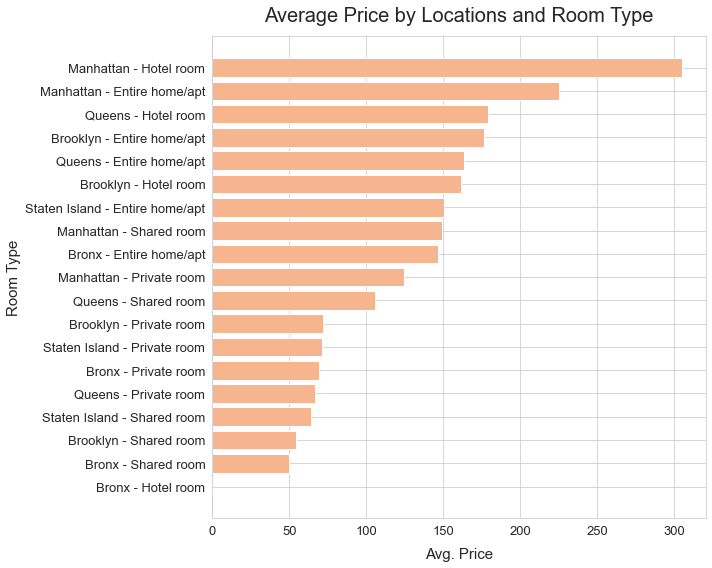

In [16]:
# add some visualization for the comparison
df_price_by_loc_type.sort_values('Avg. Price', ascending = True, inplace = True)
plt.figure(figsize=(10,8))
plt.barh(df_price_by_loc_type.County + ' - ' + df_price_by_loc_type['Room Type'], df_price_by_loc_type['Avg. Price'])
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Avg. Price', fontsize = 15, labelpad = 10)
plt.ylabel('Room Type', fontsize = 15)
plt.title('Average Price by Locations and Room Type', fontsize = 20, pad=15)
plt.tight_layout()
plt.savefig('price_by_type.png')
plt.show()

Then what about the rating scores? Does the most expensive area provide the best experience? <br/> Surprisingly, quite the contrary.

In [17]:
df_review = listings.groupby(['neighbourhood_group_cleansed'])[['review_scores_rating']].mean().sort_values(by = 'review_scores_rating', ascending = False).reset_index()
df_review.columns = ['County', 'Avg. Rating']
print(df_review)

# export the df for Medium post
df_review.dfi.export('avg_rating_loc.png')

          County  Avg. Rating
0  Staten Island        94.92
1       Brooklyn        94.36
2          Bronx        94.09
3         Queens        93.22
4      Manhattan        93.16


## What time do people usually visit the big apple

From the Airbnb data we cannot really know when exactly does people visit the city. But assuming that people usually comment or review their experience soon after their trip, we can use time of the reviews as a proxy to answer the question.

### Assess

Let's take a look at the history by date in order to see what's the general trend for daily reviews:

In [18]:
df_daily = reviews_sum.groupby('date').count()
df_daily.index = pd.to_datetime(df_daily.index)

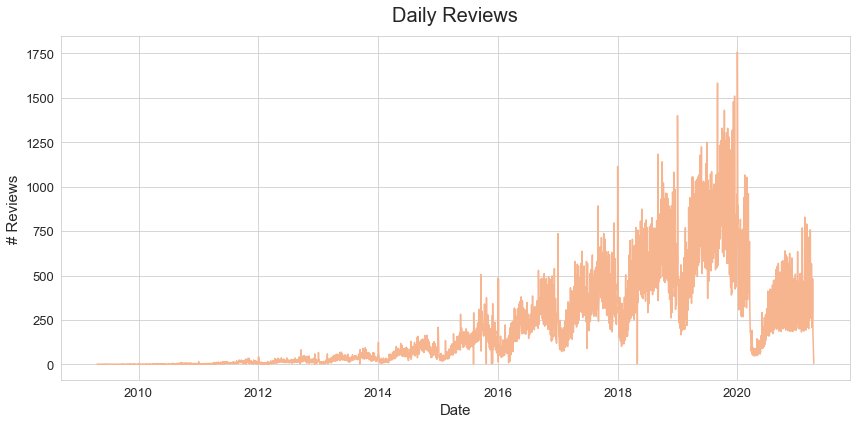

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df_daily)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('# Reviews', fontsize = 15)
plt.title('Daily Reviews', fontsize = 20, pad=15)
plt.tight_layout()
plt.savefig('reviews_daily.png')
plt.show()

Although this is not the best and clearest way to show it, we can still see the increasing trend and seasonality.

In [20]:
reviews_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836586 entries, 0 to 836585
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  836586 non-null  int64 
 1   date        836586 non-null  object
dtypes: int64(1), object(1)
memory usage: 12.8+ MB


### Clean

Next, let's separate the general trend and seasonality to take a closer look. And we are only doing it using the most recent data of 2014 - 2019. We are excluding 2020 for obvious reasons.

In [21]:
reviews_daily = reviews_sum[(reviews_sum.date >= '2014-01-01') & (reviews_sum.date <= '2019-12-31')].groupby('date').count()

In [22]:
date_list = pd.date_range(start="2014-01-01",end = "2019-12-31")

In [23]:
# use reindex to fill in possible dates with no reviews by linear interpolation
reviews_daily.index = pd.to_datetime(reviews_daily.index)
reviews_daily = reviews_daily.reindex(date_list, method='pad')

### Analyze, Model and Visualize

To better understand the trend, we want to fit it using a quadratic polynomial

In [24]:
model = np.polyfit(range(reviews_daily.shape[0]), reviews_daily['listing_id'],2)
fit = np.poly1d(model)

In [25]:
# add the fitted value in the dataframe
reviews_daily['poly_fit'] = fit(range(reviews_daily.shape[0]))

To remove the fluctuation, let's take a rolling window of 365 days and look at the average number. The first 364 values will be null after taking the rolling average so we need to drop them.

In [26]:
reviews_daily_y= reviews_daily.rolling(365).mean().dropna()

In [27]:
reviews_daily_y.head()

,listing_id,poly_fit
2014-12-31,64.08,68.02
2015-01-01,64.35,68.11
2015-01-02,64.64,68.19
2015-01-03,64.83,68.28
2015-01-04,65.04,68.36


Visualization of the trend

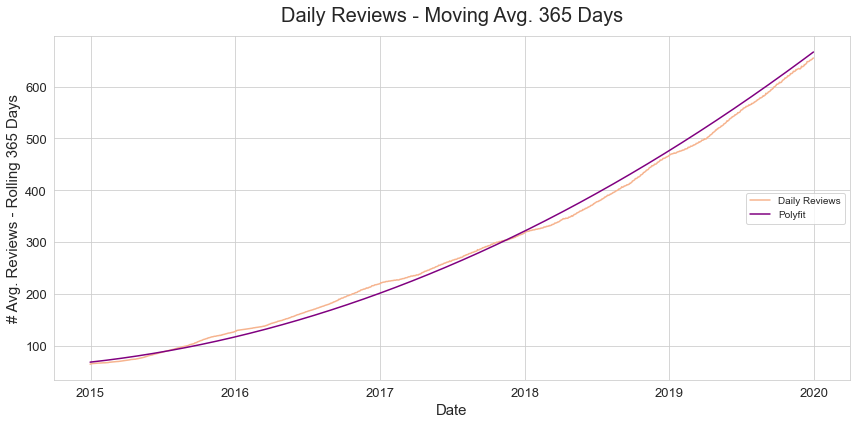

In [28]:
# reviews_daily.rolling(365).mean().dropna().plot()
plt.figure(figsize = (12,6))
plt.plot(reviews_daily_y['listing_id'], label = 'Daily Reviews')
plt.plot(reviews_daily_y['poly_fit'], color = 'purple', label = 'Polyfit')
# plt.plot(list(lr.predict(np.array(range(reviews_daily.shape[0])).reshape(730,1)).reshape(730,)))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('# Avg. Reviews - Rolling 365 Days', fontsize = 15)
plt.legend(loc = 'right')
plt.title('Daily Reviews - Moving Avg. 365 Days', fontsize = 20, pad=15)
plt.tight_layout()
plt.savefig('reviews_daily_y.png')
plt.show()

To look at the seasonality, we first roll up the daily number to monthly sum, then divide them by the total number of that year to see what's the percentage. 

In [29]:
# calculate monthly, annual number and the percentage
reviews_monthly = reviews_daily.resample('M').sum()[['listing_id']]
reviews_monthly['Year'] = reviews_monthly.index.year
reviews_monthly['Annual sum'] = reviews_monthly.groupby(['Year'])['listing_id'].transform('sum')
reviews_monthly['pct_annual'] = reviews_monthly['listing_id']/reviews_monthly['Annual sum']
reviews_monthly.head()

,listing_id,Year,Annual sum,pct_annual
2014-01-31,891,2014,23391,0.04
2014-02-28,531,2014,23391,0.02
2014-03-31,1042,2014,23391,0.04
2014-04-30,1657,2014,23391,0.07
2014-05-31,2128,2014,23391,0.09


Visualization for the seasonality

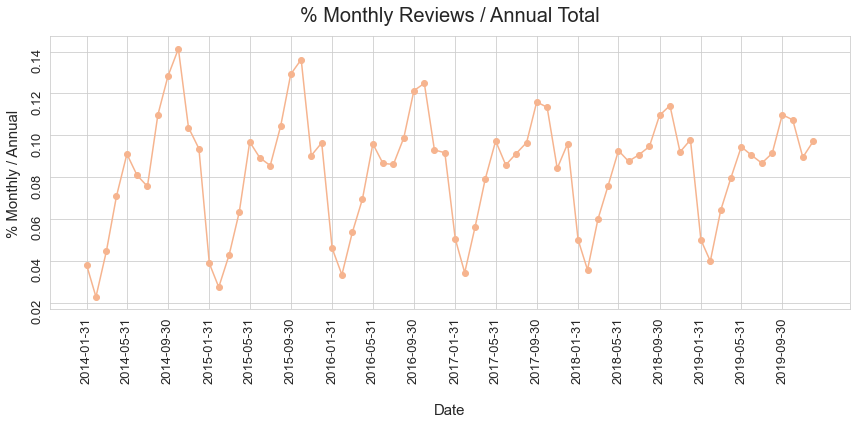

In [30]:
plt.figure(figsize=(12,6))
plt.plot(reviews_monthly.pct_annual, marker = 'o')
plt.xticks(reviews_monthly.index[::4])
plt.yticks(fontsize = 13)
plt.xlabel('Date', fontsize = 15, labelpad = 20)
plt.ylabel('% Monthly / Annual', fontsize = 15, labelpad = 10)
plt.tick_params(labelrotation = 90, labelsize = 13)
plt.title('% Monthly Reviews / Annual Total', fontsize = 20, pad=15)
plt.tight_layout()
plt.savefig('season_monthly.png')
# plt.MinNLocator(200)
plt.show()
# reviews_monthly.pct_annual.plot()

## What are the top words people used to decribe their properties in NYC

We will use the pos_tag function in nltk to identify the part of speech in the names.

### Assess and Clean

In [31]:
listings.name.head(10)

0                                Skylit Midtown Castle
1    Whole flr w/private bdrm, bath & kitchen(pls r...
2                                      BlissArtsSpace!
3             Spacious Brooklyn Duplex, Patio + Garden
4                     Large Furnished Room Near B'way　
5                   Cozy Clean Guest Room - Family Apt
6       Lovely Room 1, Garden, Best Area, Legal rental
7                     Only 2 stops to Manhattan studio
8    Uptown Sanctuary w/ Private Bath (Month to Month)
9                              UES Beautiful Blue Room
Name: name, dtype: object

From above sample we can see that there are some frequent words that don't really have that much meaning like 'room'. And also we don't care about the punctuations. We'll ignore them all by adding a filter in the analysis.

Below is the function we create in order to clean up and transform the name column to a list of words we want to keep:

In [32]:
# Ref: https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b
def pos_transform(desc):
    '''
    Return the list of words with the part of speech we want to focus on 
    and remove some of the frequent but not meaningful words in our use case.
    
    INPUT: caption of a listing
    OUTPUT: list of meaningful words based on their pos
    
    '''
    if desc == np.nan:
        return
    tokens = nltk.word_tokenize(desc)
    pos_tag_list = nltk.pos_tag(tokens)
    results = []
    for w, p in pos_tag_list:
        if p in ['NNP','NNPS','NN','NNS', 'JJ'] \
        and w.lower() not in ['room', 'rm','bedroom', 'apt', 'apartment', 'bdrm','br','1br', '2br','3br']:
            results.append(w)
    return results

In [33]:
names_transform = listings.name.fillna('').apply(pos_transform)
names_transform.head(10)

0                            [Skylit, Midtown, Castle]
1    [Whole, flr, w/private, bath, kitchen, pls, read]
2                                     [BlissArtsSpace]
3       [Spacious, Brooklyn, Duplex, Patio, +, Garden]
4                      [Large, Furnished, Near, B'way]
5                                 [Cozy, Clean, Guest]
6                  [Garden, Best, Area, Legal, rental]
7                           [stops, Manhattan, studio]
8         [Sanctuary, w/, Private, Bath, Month, Month]
9                               [UES, Beautiful, Blue]
Name: name, dtype: object

### Analyze, Model and Visualize

In [34]:
# count the appearance of each word
df_freq_words = pd.DataFrame(
            pd.DataFrame(names_transform.to_list()).stack().str.lower().value_counts()
            , columns = ['Frequency'])\
            .rename_axis('Word').reset_index()

# export for Medium post
df_freq_words.head(20).dfi.export('df_freq_words.png')

In [35]:
print(df_freq_words.head(30))

            Word  Frequency
0        private       5495
1           cozy       3534
2         studio       3108
3       brooklyn       2837
4       spacious       2692
5      manhattan       2499
6           park       2217
7           east       2070
8      beautiful       1923
9          sunny       1882
10  williamsburg       1797
11          home       1568
12       village       1517
13           nyc       1515
14           new       1509
15         heart       1505
16         large       1425
17          loft       1397
18        modern       1394
19        luxury       1288
20       central       1241
21      location       1220
22        bright       1199
23           bed       1174
24          west       1077
25       midtown       1048
26          side       1036
27         upper       1007
28      bushwick        945
29         clean        908


We can use the WordCloud to better visualize this:

In [36]:
# convert above df into a dictionary for next step
dict_word_freq = df_freq_words.head(30).set_index('Word').to_dict()['Frequency']

In [37]:
wordcloud = WordCloud(
        width = 400, height = 400,
                background_color ='white').generate_from_frequencies(dict_word_freq)

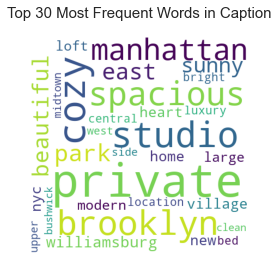

In [38]:
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Top 30 Most Frequent Words in Caption', fontsize = 15, pad = 20)
plt.show()
wordcloud.to_file('Top_30_word_cloud.png')
# plt.savefig('Top_30_word_cloud.png')